In [1]:
s = 'foo'
s in 'That is food for thought.'

True

In [2]:
s in 'That is good for now.'

False

In [3]:
s not in 'That is good for now.'

True

문자열 관련 함수

In [4]:
ord('a')

97

In [5]:
chr(44032)

'가'

In [6]:
len('안녕하세요')

5

In [7]:
str(42)

'42'

문자열 메소드

In [8]:
s = 'foobar'

In [9]:
s.count('o')

2

In [10]:
s.find('b')

3

In [11]:
s.startswith('f')

True

In [12]:
x = '    hello   '

In [13]:
x.strip()

'hello'

문서 단어 행렬

In [14]:
import pandas as pd
df = pd.read_excel('data/yelp.xlsx')

In [15]:
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [16]:
df.shape

(1000, 2)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, stop_words='english')

불용어

In [18]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
#ENGLISH_STOP_WORDS

In [19]:
stop_words = ENGLISH_STOP_WORDS | {'my_stop_word'}

In [20]:
#stop_words

In [21]:
dtm = cv.fit_transform(df['review'])

In [22]:
dtm.shape

(1000, 500)

In [23]:
cv.get_feature_names_out()

array(['10', '100', '12', '20', '30', '35', '40', 'absolutely', 'ago',
       'amazing', 'ambiance', 'ambience', 'anytime', 'area', 'arrived',
       'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'authentic',
       'average', 'avoid', 'away', 'awesome', 'awful', 'bacon', 'bad',
       'bar', 'barely', 'basically', 'bathroom', 'batter', 'bay', 'beans',
       'beat', 'beautiful', 'beef', 'beer', 'believe', 'belly', 'best',
       'better', 'big', 'biscuits', 'bisque', 'bit', 'bite', 'bites',
       'black', 'bland', 'boyfriend', 'bread', 'breakfast', 'bring',
       'brought', 'brunch', 'buffet', 'burger', 'burgers', 'business',
       'busy', 'butter', 'cafe', 'came', 'care', 'check', 'checked',
       'cheese', 'chef', 'chewy', 'chicken', 'chips', 'clean', 'close',
       'cold', 'come', 'coming', 'considering', 'cooked', 'cool',
       'couldn', 'couple', 'course', 'cream', 'customer', 'damn', 'day',
       'deal', 'decor', 'definitely', 'delicious', 'delish', 'deserves',
      

단어 빈도

In [24]:
dtm.sum(axis=0)

matrix([[  5,   2,   2,   4,   5,   3,   4,   8,   3,  24,   7,   3,   5,
           7,   3,   4,   5,   3,  11,   7,   6,   4,   5,   5,  12,   3,
           5,  18,   7,   5,   2,   3,   2,   4,   3,   4,   3,   5,   8,
           3,   2,  30,  16,   3,   2,   2,   8,   2,   2,   2,  11,   3,
           5,  10,   5,   3,   3,  11,  12,   4,   4,   3,   3,   3,  20,
           3,   7,   3,   3,   4,   3,  17,   7,   9,   4,   9,  11,  10,
           4,   7,   3,   3,   3,   3,   4,   6,   4,   9,   7,   3,  19,
          23,   3,   3,   5,   3,  22,  13,   3,   8,   6,   4,  19,   5,
           4,   8,   9,   3,  26,   3,   3,   4,   4,   4,   4,   3,  19,
           5,   8,   3,   3,   6,   5,   3,   3,   4,  10,   5,   3,  20,
           5,   4,   7,  12,   7,   5,   3,  11,   2,   2,   2,   8,   2,
           2,   2,   3,   2,   5,   3,  13,   3,   2,   2,   2,   2,   4,
         126,  14,   5,   5,  27,   4,   9,   3,   2,   4,   2,   4,   3,
           8,   2,   2,  18,   2,   3,

In [25]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': dtm.sum(axis=0).flat
})

In [26]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
156,food,126
316,place,106
175,good,95
389,service,85
178,great,70


## 단어 구름

In [29]:
from wordcloud import WordCloud

In [30]:
wc = WordCloud(
  font_path='NanumGothic.ttf', # 글꼴 파일이 있을 경우
  background_color='white',    # 배경색
  max_words=100,               # 시각화할 단어 개수
  width=400,                   # 가로 크기
  height=300)                  # 세로 크기

In [31]:
count_dic = dict(zip(word_count.단어, word_count.빈도))

In [33]:
cloud = wc.fit_words(count_dic)

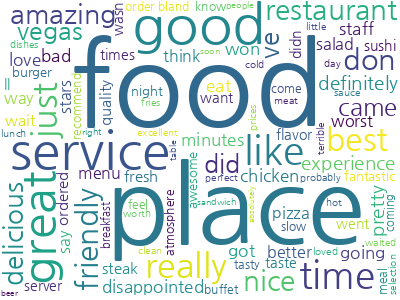

In [34]:
cloud.to_image()

In [35]:
cloud.to_file('save/cloud.png')